In [180]:
# Dependencies
import matplotlib.pyplot as plt
import requests
import json
import scipy.stats as stats
import pandas as pd
import random
import datetime
from citipy import citipy
from config import weather_api_key

## Generate Cities List

In [64]:
# We need 500 cities spread across varying latitude ranges, between -90 to 90.
# Longitude ranges between -180 to 180.
# To get random cities, we can generate a list of random numbers between these ranges, then find the
# nearest cities using Citipy

# Create empty lists
cities = []
countries = []

# Loop for 1000 cities, in case of duplicates
for x in range(1500):
    # Generate random coordinates
    # N.B. Numbers are 100x lat/long range so we can turn it into a float with 2 decimal places
    lat = random.randrange(-9000,9000)/100
    long = random.randrange(-18000,18000)/100

    # Get nearest cities
    city = citipy.nearest_city(lat,long)
    cities.append(city.city_name.title())
    countries.append(city.country_code.upper())
    
#print(f"Cities: {cities}")

In [66]:
# Add cities to DataFrame
weather_df = pd.DataFrame({"City": cities,
                         "Country": countries})

weather_df.head()

,City,Country
0,Belmonte,BR
1,Soledade,BR
2,Tuktoyaktuk,CA
3,Wanning,CN
4,Taolanaro,MG


In [67]:
# Drop duplicate cities
weather_df = weather_df.drop_duplicates(subset=None,keep="first", inplace=False)
weather_df

,City,Country
0,Belmonte,BR
1,Soledade,BR
2,Tuktoyaktuk,CA
3,Wanning,CN
4,Taolanaro,MG
...,...,...
1487,Luena,AO
1495,Nanton,CA
1496,San Lorenzo,BO
1497,Petropavlovsk-Kamchatskiy,RU


In [68]:
# Reset the index of the data frame so we don't have missing index numbers
weather_df = weather_df.reset_index(drop=True)
weather_df


,City,Country
0,Belmonte,BR
1,Soledade,BR
2,Tuktoyaktuk,CA
3,Wanning,CN
4,Taolanaro,MG
...,...,...
605,Luena,AO
606,Nanton,CA
607,San Lorenzo,BO
608,Petropavlovsk-Kamchatskiy,RU


## Get Weather Data

In [91]:
# Set up initial query URL
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "imperial"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="

# Loop through the Data Frame for cities and perform a request for data on each, then store the requested data in the Data Frame
for index, row in weather_df.iterrows():
    # Get search city from data frame
    city = f'{row["City"]}, {row["Country"]}'

    # Call OpenWeatherMap API
    response = requests.get(query_url + city).json()

    print(f"Checking record # {index} | city: {city}")
    # Store data only if info found
    try:
        # Store Latitude, Longitude, Temperature (F), Humidity (%), Cloudiness (%), Wind Speed (mph) data
        weather_df.loc[index, "Latitude"] = float(response["coord"]["lat"])
        weather_df.loc[index, "Longitude"] = float(response["coord"]["lon"])
        weather_df.loc[index, "Temperature (F)"] = float(response["main"]["temp_max"])
        weather_df.loc[index, "Humidity (%)"] = float(response["main"]["humidity"])
        weather_df.loc[index, "Cloudiness (%)"] = float(response["clouds"]["all"])
        weather_df.loc[index, "Wind Speed (mph)"] = float(response["wind"]["speed"])
        weather_df.loc[index, "Date Time"] = response["dt"]
        
    except:
        # If city not found, let us know!
        print(f"{city} not found on Weather API")
        
    # Use this just while testing if only want to test on a few rows
    #if index > 10:
    #    break

# Check to make sure data saved
weather_df.head()

Checking record # 0 | city: Belmonte, BR
Checking record # 1 | city: Soledade, BR
Checking record # 2 | city: Tuktoyaktuk, CA
Checking record # 3 | city: Wanning, CN
Checking record # 4 | city: Taolanaro, MG
Taolanaro, MG not found on Weather API
Checking record # 5 | city: Khatanga, RU
Checking record # 6 | city: Sur, OM
Checking record # 7 | city: Mataura, PF
Mataura, PF not found on Weather API
Checking record # 8 | city: Khatassy, RU
Checking record # 9 | city: Kampong Thum, KH
Checking record # 10 | city: Hobart, AU
Checking record # 11 | city: Najran, SA
Checking record # 12 | city: Tsihombe, MG
Tsihombe, MG not found on Weather API
Checking record # 13 | city: Dikson, RU
Checking record # 14 | city: Gawler, AU
Checking record # 15 | city: Victoria, SC
Checking record # 16 | city: Cherskiy, RU
Checking record # 17 | city: Port Elizabeth, ZA
Checking record # 18 | city: Benton Harbor, US
Checking record # 19 | city: Tilichiki, RU
Checking record # 20 | city: Vila Franca Do Campo, 

Checking record # 170 | city: Rock Sound, BS
Checking record # 171 | city: Dubbo, AU
Checking record # 172 | city: Cabedelo, BR
Checking record # 173 | city: Vila Velha, BR
Checking record # 174 | city: Mayumba, GA
Checking record # 175 | city: Ukiah, US
Checking record # 176 | city: Chapais, CA
Checking record # 177 | city: La Union, GT
Checking record # 178 | city: Henties Bay, NA
Checking record # 179 | city: Halalo, WF
Halalo, WF not found on Weather API
Checking record # 180 | city: Marsh Harbour, BS
Checking record # 181 | city: Kaniama, CD
Checking record # 182 | city: Grindavik, IS
Checking record # 183 | city: Ahipara, NZ
Checking record # 184 | city: Wahran, DZ
Wahran, DZ not found on Weather API
Checking record # 185 | city: Iqaluit, CA
Checking record # 186 | city: New Norfolk, AU
Checking record # 187 | city: Davidson, CA
Checking record # 188 | city: Calvinia, ZA
Checking record # 189 | city: Kyren, RU
Checking record # 190 | city: San Patricio, MX
Checking record # 191 |

Checking record # 343 | city: Guerrero Negro, MX
Checking record # 344 | city: Gumdag, TM
Checking record # 345 | city: Acapulco, MX
Checking record # 346 | city: Vaitupu, WF
Vaitupu, WF not found on Weather API
Checking record # 347 | city: Siddipet, IN
Checking record # 348 | city: Kamaishi, JP
Checking record # 349 | city: Luderitz, NA
Checking record # 350 | city: Sobolevo, RU
Checking record # 351 | city: Sabaudia, IT
Checking record # 352 | city: Voznesenye, RU
Checking record # 353 | city: Vila, VU
Vila, VU not found on Weather API
Checking record # 354 | city: Hoquiam, US
Checking record # 355 | city: Srednekolymsk, RU
Checking record # 356 | city: Cayenne, GF
Checking record # 357 | city: Necochea, AR
Checking record # 358 | city: Karpathos, GR
Checking record # 359 | city: Flinders, AU
Checking record # 360 | city: Kabo, CF
Checking record # 361 | city: Santa Cruz, CR
Checking record # 362 | city: Coahuayana, MX
Checking record # 363 | city: Mayo, CA
Checking record # 364 | c

Checking record # 524 | city: Krutikha, RU
Checking record # 525 | city: Hervey Bay, AU
Checking record # 526 | city: Trollhattan, SE
Checking record # 527 | city: Ystad, SE
Checking record # 528 | city: Errol, GB
Checking record # 529 | city: Salamiyah, SY
Checking record # 530 | city: Warrnambool, AU
Checking record # 531 | city: Satitoa, WS
Satitoa, WS not found on Weather API
Checking record # 532 | city: Comodoro Rivadavia, AR
Checking record # 533 | city: Elverum, NO
Checking record # 534 | city: La Rioja, AR
Checking record # 535 | city: Saint-Pierre, RE
Checking record # 536 | city: Vestmannaeyjar, IS
Checking record # 537 | city: Presidencia Roque Saenz Pena, AR
Checking record # 538 | city: Kichmengskiy Gorodok, RU
Checking record # 539 | city: Kasongo-Lunda, CD
Checking record # 540 | city: Tupik, RU
Checking record # 541 | city: Ulaanbaatar, MN
Checking record # 542 | city: Zhigalovo, RU
Checking record # 543 | city: Laurel, US
Checking record # 544 | city: Bababe, MR
Babab

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Time
0,Belmonte,BR,-15.86,-38.88,80.60,61.0,40.0,9.17,1601056674
1,Soledade,BR,-28.82,-52.51,80.60,42.0,20.0,11.41,1601056729
2,Tuktoyaktuk,CA,69.45,-133.04,35.60,100.0,90.0,14.99,1601056437
3,Wanning,CN,18.80,110.40,79.59,80.0,99.0,1.97,1601056386
4,Taolanaro,MG,NaN,NaN,NaN,NaN,NaN,NaN,NaT


In [92]:
# Check data types
weather_df.dtypes

City                 object
Country              object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
Date Time            object
dtype: object

In [93]:
# Check how many cities missing data
weather_df.count()

City                610
Country             610
Latitude            544
Longitude           544
Temperature (F)     544
Humidity (%)        544
Cloudiness (%)      544
Wind Speed (mph)    544
Date Time           544
dtype: int64

In [94]:
# Drop cities with missing data
weather_df = weather_df.dropna(how="any")

# Check if all columns have same number
weather_df.count()

City                544
Country             544
Latitude            544
Longitude           544
Temperature (F)     544
Humidity (%)        544
Cloudiness (%)      544
Wind Speed (mph)    544
Date Time           544
dtype: int64

## Convert Data to CSV

In [106]:
# Yay! Now we have our data set with 500+ cities
# Now let's save our data to CSV, dropping the index column
weather_df.to_csv("data/weather_data.csv", index=False)

In [107]:
# In the even of closing the Notebook, let's read the data we want to analyse from the CSV we saved
city_weather_df = pd.read_csv("data/weather_data.csv")

# View top of data frame
city_weather_df.head(10)

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Time
0,Belmonte,BR,-15.86,-38.88,80.60,61.0,40.0,9.17,1601056674
1,Soledade,BR,-28.82,-52.51,80.60,42.0,20.0,11.41,1601056729
2,Tuktoyaktuk,CA,69.45,-133.04,35.60,100.0,90.0,14.99,1601056437
3,Wanning,CN,18.80,110.40,79.59,80.0,99.0,1.97,1601056386
4,Khatanga,RU,71.97,102.50,38.97,85.0,99.0,8.52,1601056437
5,Sur,OM,22.57,59.53,82.60,63.0,0.0,8.70,1601056435
6,Khatassy,RU,61.90,129.64,46.40,49.0,92.0,4.47,1601056534
7,Kampong Thum,KH,12.71,104.89,76.64,84.0,94.0,2.89,1601056534
8,Hobart,AU,-42.88,147.33,46.40,87.0,90.0,4.70,1601056318
9,Najran,SA,17.49,44.13,86.00,16.0,0.0,6.93,1601056431


In [98]:
# Check data frame for potential errors
city_weather_df.describe()

,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Time
count,544.000000,544.000000,544.000000,544.000000,544.000000,544.000000,5.440000e+02
mean,19.308585,21.142371,64.933548,69.233456,48.430147,8.871029,1.601057e+09
std,35.126233,92.347598,17.597690,21.454108,37.271769,6.003792,1.069984e+02
min,-54.800000,-179.170000,16.880000,7.000000,0.000000,0.490000,1.601056e+09
25%,-9.497500,-62.207500,50.000000,59.000000,8.000000,4.560000,1.601057e+09
50%,22.910000,25.555000,68.000000,74.000000,40.000000,8.010000,1.601057e+09
75%,50.712500,103.350000,78.800000,85.000000,87.000000,11.447500,1.601057e+09
max,78.220000,179.320000,106.630000,100.000000,100.000000,41.380000,1.601057e+09


In [99]:
# Double check data types
city_weather_df.dtypes

City                 object
Country              object
Latitude            float64
Longitude           float64
Temperature (F)     float64
Humidity (%)        float64
Cloudiness (%)      float64
Wind Speed (mph)    float64
Date Time             int64
dtype: object

## Plot Data

In [132]:
# Get date from data so we know what date we're plotting
data_date = datetime.datetime.utcfromtimestamp(city_weather_df.loc[0,"Date Time"])

# Convert date to string we can use on our charts
date_str = data_date.strftime("%Y-%m-%d")
date_str

'2020-09-25'

### Latitude vs. Temperature Plot

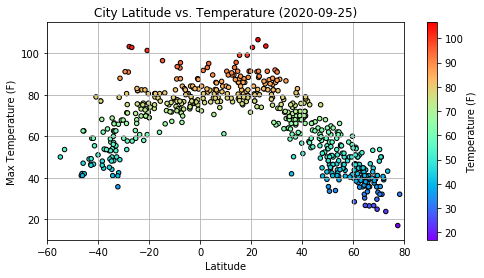

In [176]:
temperature_plot = city_weather_df.plot(x="Latitude", y="Temperature (F)", kind="scatter", 
                                        title=f"City Latitude vs. Temperature ({date_str})",
                                       c="Temperature (F)", colormap="rainbow", edgecolors="black",
                                       figsize=(8,4), sharex=False)

# Set labels
temperature_plot.set_xlabel("Latitude")
temperature_plot.set_ylabel("Max Temperature (F)")

temperature_plot.set_xlim(-60,80)
temperature_plot.set_ylim(10,115)

# Add grid
temperature_plot.grid()

# Save chart to external file
plt.savefig(f"images/lat_temp_{date_str}.png")

# Print chart
plt.show()

* This chart shows that on September 25, 2020, the closer to the equator (latitude = 0), generally the hotter the temperature. Although it is slightly warmer in the Northern Hemisphere (latitude > 0), closer to the equator. This is likely because the Northern Hemisphere is closer to summer than winter compared to the Southern Hemisphere.

### Latitude vs. Humidity Plot

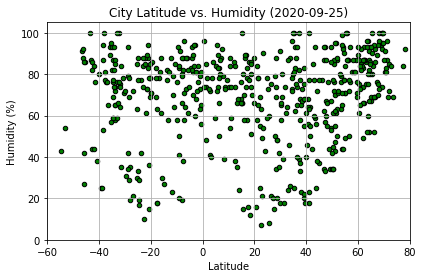

In [170]:
humidity_plot = city_weather_df.plot("Latitude","Humidity (%)", kind="scatter", 
                                     title=f"City Latitude vs. Humidity ({date_str})",
                                    marker="o", color="green", edgecolors="black", figsize=(6.5,4))

# Set labels
humidity_plot.set_xlabel("Latitude")
humidity_plot.set_ylabel("Humidity (%)")

# Set limits
humidity_plot.set_xlim(-60,80)
humidity_plot.set_ylim(0,105)

# Add grid
humidity_plot.grid()

# Save chart to external file
plt.savefig(f"images/lat_humidity_{date_str}.png")

# Print chart
plt.show()

### Latitude vs. Cloudiness Plot

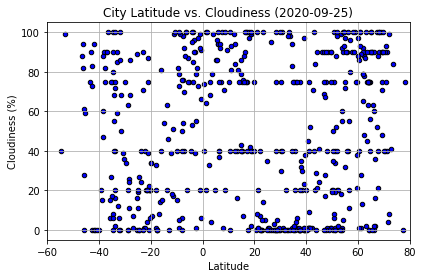

In [172]:
cloud_plot = city_weather_df.plot("Latitude","Cloudiness (%)", kind="scatter", 
                                     title=f"City Latitude vs. Cloudiness ({date_str})",
                                    marker="o", color="blue", edgecolors="black", figsize=(6.5,4))

# Set labels
cloud_plot.set_xlabel("Latitude")
cloud_plot.set_ylabel("Cloudiness (%)")

# Set limits
cloud_plot.set_xlim(-60,80)
cloud_plot.set_ylim(-5,105)

# Add grid
cloud_plot.grid()

# Save chart to external file
plt.savefig(f"images/lat_cloud_{date_str}.png")

# Print chart
plt.show()

### Latitude vs. Wind Speed Plot

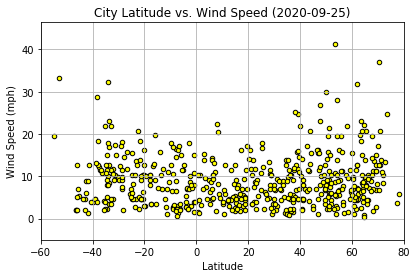

In [175]:
wind_plot = city_weather_df.plot("Latitude","Wind Speed (mph)", kind="scatter", 
                                     title=f"City Latitude vs. Wind Speed ({date_str})",
                                    marker="o", color="yellow", edgecolors="black", figsize=(6.5,4))

# Set labels
wind_plot.set_xlabel("Latitude")
wind_plot.set_ylabel("Wind Speed (mph)")

# Set limits
wind_plot.set_xlim(-60,80)
wind_plot.set_ylim(-5,city_weather_df["Wind Speed (mph)"].max()+5)

# Add grid
wind_plot.grid()

# Save chart to external file
plt.savefig(f"images/lat_wind_{date_str}.png")

# Print chart
plt.show()

* Wind speed looks fairly evenly distributed across cities, which suggests minimal correlation. Most wind speed is under 20mph. The higher wind speeds above 20mph are generally further away from the equator.

## Linear Regression, and Comparing Hemispheres

In [177]:
# Create new data frames for Northern Hemisphere and Southern Hemisphere data

# Northern Hemisphere
northern_df = city_weather_df.loc[city_weather_df["Latitude"]>0,:]
northern_df.head(10)

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Time
2,Tuktoyaktuk,CA,69.45,-133.04,35.60,100.0,90.0,14.99,1601056437
3,Wanning,CN,18.80,110.40,79.59,80.0,99.0,1.97,1601056386
4,Khatanga,RU,71.97,102.50,38.97,85.0,99.0,8.52,1601056437
5,Sur,OM,22.57,59.53,82.60,63.0,0.0,8.70,1601056435
6,Khatassy,RU,61.90,129.64,46.40,49.0,92.0,4.47,1601056534
7,Kampong Thum,KH,12.71,104.89,76.64,84.0,94.0,2.89,1601056534
9,Najran,SA,17.49,44.13,86.00,16.0,0.0,6.93,1601056431
10,Dikson,RU,73.51,80.55,43.16,69.0,84.0,24.83,1601056731
13,Cherskiy,RU,68.75,161.30,39.22,94.0,100.0,13.73,1601056732
15,Benton Harbor,US,42.12,-86.45,77.00,44.0,1.0,7.07,1601056521


In [178]:
# Southern Hemisphere
southern_df = city_weather_df.loc[city_weather_df["Latitude"]<0,:]
southern_df.head(10)

,City,Country,Latitude,Longitude,Temperature (F),Humidity (%),Cloudiness (%),Wind Speed (mph),Date Time
0,Belmonte,BR,-15.86,-38.88,80.60,61.0,40.0,9.17,1601056674
1,Soledade,BR,-28.82,-52.51,80.60,42.0,20.0,11.41,1601056729
8,Hobart,AU,-42.88,147.33,46.40,87.0,90.0,4.70,1601056318
11,Gawler,AU,-34.60,138.73,44.01,87.0,8.0,2.35,1601056731
12,Victoria,SC,-4.62,55.45,80.60,83.0,40.0,12.75,1601056732
14,Port Elizabeth,ZA,-33.92,25.57,62.60,72.0,20.0,32.21,1601056732
19,Atuona,PF,-9.80,-139.03,77.92,76.0,15.0,17.81,1601056733
24,Port Alfred,ZA,-33.59,26.89,62.40,65.0,16.0,16.84,1601056735
27,Taltal,CL,-25.40,-70.48,62.76,63.0,89.0,5.91,1601056736
28,Ushuaia,AR,-54.80,-68.30,50.00,43.0,40.0,19.46,1601056736


### Temperature in Each Hemisphere

#### Northern Hemisphere - Max Temp vs. Latitude Linear Regression

The r-value is -0.88
Regression equation: y = -0.82x + 96.26


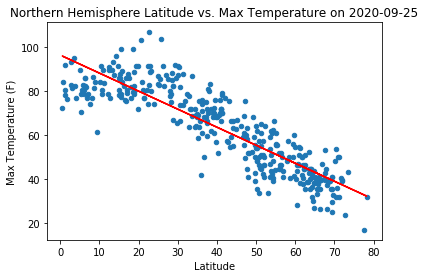

In [189]:
# Calculate the correlation coefficient and linear regression model 
# for temperature vs. latitude

# Set x and y values
x = northern_df["Latitude"]
y = northern_df["Temperature (F)"]

# Calculate regression
(slope, intercept, r, p, std_err) = stats.linregress(x, y)
print(f"The r-value is {round(r,2)}")

regress_values = slope * x + intercept
print("Regression equation: y = " + str(round(slope,2)) + "x + " + str(round(intercept,2)))

# Plot scatter chart again
scatter_chart = northern_df.plot.scatter(x="Latitude", y="Temperature (F)", 
                                               title=f"Northern Hemisphere Latitude vs. Max Temperature on {date_str}")

scatter_chart.set_xlabel("Latitude")
scatter_chart.set_ylabel("Max Temperature (F)")

# Plot regress line
plt.plot(x,regress_values,"r-")

# Save chart to external file
plt.savefig(f"images/northern_temp_{date_str}.png")

# Display chart
plt.show()